/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


Linear Regression R-squared: 0.9248264874939652
Polynomial Regression R-squared: 0.9703466776747576
Ridge Regression R-squared: 0.9248283483757784
SVR R-squared: 0.6117460964986534


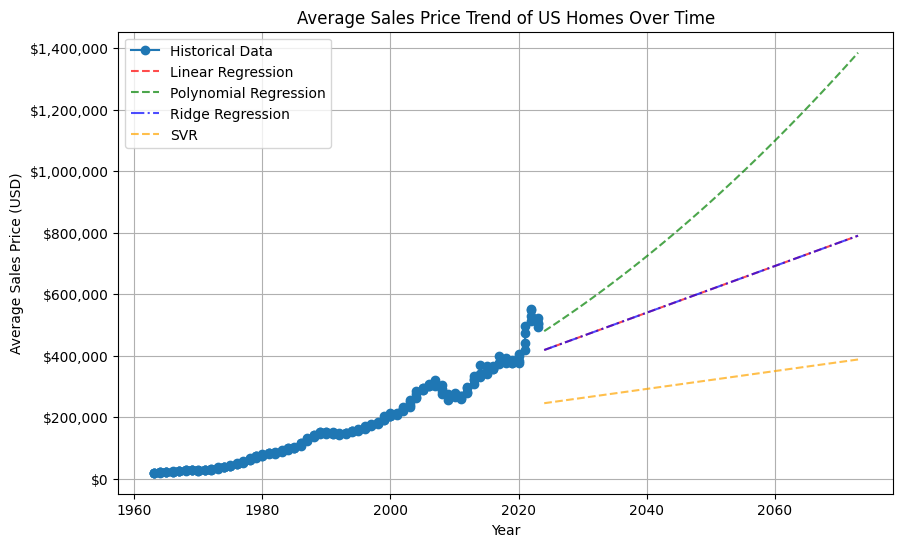

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.svm import SVR


#load the Data
file_path = 'ASPUS.xlsx'
df = pd.read_excel(file_path)

#preprocess the Data
df['year'] = df['observation_date'].dt.year
df.drop(columns=['observation_date'], inplace=True)

models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': PolynomialFeatures(degree=2),
    'Ridge Regression': Ridge(alpha=0.5),
    'SVR': SVR(kernel='linear')
}


X = df[['year']]
y = df['ASPUS']
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

#train the model
trained_models = {}
for name, model in models.items():
    X_train_np = X_train.values
    X_test_np = X_test.values
    if name == 'Polynomial Regression':
        poly = PolynomialFeatures(degree=2)
        X_poly = poly.fit_transform(X_train_np)
        model = LinearRegression()
        model.fit(X_poly, y_train)
    elif name == 'Ridge Regression':
        model = Ridge(alpha=0.5)
        model.fit(X_train_np, y_train)
    else:
        model.fit(X_train_np, y_train)
    trained_models[name] = model


# evaluate the models
for name, model in trained_models.items():
    if name == 'Polynomial Regression':
        X_test_poly = poly.transform(X_test)
        score = model.score(X_test_poly, y_test)
    else:
        score = model.score(X_test, y_test)
    print(f"{name} R-squared:", score)

#make Predictions
future_years = np.arange(2024, 2074).reshape(-1, 1)
predicted_prices = {}
for name, model in trained_models.items():
    if name == 'Polynomial Regression':
        future_years_poly = poly.transform(future_years)
        future_prices = model.predict(future_years_poly)
    else:
        future_prices = model.predict(future_years.reshape(-1,1))
    predicted_prices[name] = future_prices


#visualize Results
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['ASPUS'], label='Historical Data', marker='o', linestyle='-')

#plot Linear Regression
linear_model = trained_models['Linear Regression']
linear_future_prices = linear_model.predict(future_years)
plt.plot(future_years, linear_future_prices, label='Linear Regression', color='red', linestyle='--', alpha=0.7)  # Reduce opacity

#plot Polynomial Regression
poly_model = trained_models['Polynomial Regression']
poly_future_prices = poly_model.predict(poly.fit_transform(future_years))
plt.plot(future_years, poly_future_prices, label='Polynomial Regression', color='green', linestyle='--', alpha=0.7)  # Reduce opacity

#plot Ridge Regression
ridge_model = trained_models['Ridge Regression']
ridge_future_prices = ridge_model.predict(future_years)
plt.plot(future_years, ridge_future_prices, label='Ridge Regression', color='blue', linestyle='-.', alpha=0.7)  # Reduce opacity and use dash-dot line style

#plot SVR
svr_model = trained_models['SVR']
svr_future_prices = svr_model.predict(future_years)
plt.plot(future_years, svr_future_prices, label='SVR', color='orange', linestyle='--', alpha=0.7)  # Reduce opacity

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

plt.xlabel('Year')
plt.ylabel('Average Sales Price (USD)')
plt.title('Average Sales Price Trend of US Homes Over Time')
plt.legend()
plt.grid(True)
plt.show()